In [111]:
import numpy as np
import pandas as pd
import BasicModel as bm
import statsmodels.tsa as ts
import statsmodels.tsa.stattools as tst
import arch
import warnings
warnings.filterwarnings("ignore")

In [4]:
#获取三个市场的基本数据并做描述性统计
fc = bm.basicmodel()
fc.ret()
fc.ret_data.describe()

,CNY,CNH,NDF
count,2787.000000,2787.000000,2787.000000
mean,0.000038,0.000039,0.000036
std,0.002205,0.002820,0.002926
min,-0.020666,-0.017453,-0.024602
25%,-0.000829,-0.001097,-0.000991
50%,0.000029,0.000029,0.000000
75%,0.000806,0.001159,0.000992
max,0.018574,0.029092,0.043014


In [11]:
#Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
#lb_test(fc.ret_data['CNY'])
#lb_test(fc.ret_data['CNH'])
lb_test(fc.ret_data['CNY'])

,lb_stat,lb_pvalue
1,0.534538,0.464705
2,0.577713,0.749120
3,0.633149,0.888804
4,2.548500,0.635973
5,3.087807,0.686451
6,7.557252,0.272366
7,7.870596,0.344143
8,8.560484,0.380717
9,9.025578,0.434916
10,9.869557,0.452011


In [12]:
#ADF test
tst.adfuller(fc.ret_data['CNY'])
#tst.adfuller(fc.ret_data['CNH'])
#tst.adfuller(fc.ret_data['NDF'])

(-29.80109261589302,
 0.0,
 0,
 933,
 {'1%': -3.4373782772524315,
  '5%': -2.8646427696103305,
  '10%': -2.56842210151995},
 -10493.253903810337)

c:\Users\86177\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(-0.1, 0.1)

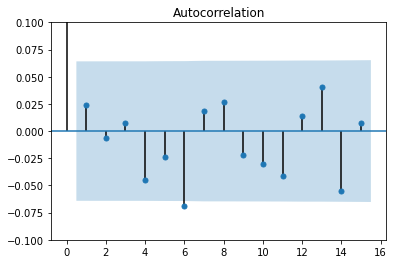

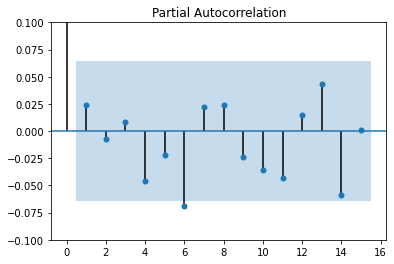

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(fc.ret_data['CNY'],lags=15)
plt.ylim([-0.1,0.1])
plot_pacf(fc.ret_data['CNY'],lags=15)
plt.ylim([-0.1,0.1])

In [8]:
#选择ARMA的滞后阶数（函数运行时间较长）
modelchoose = tst.arma_order_select_ic(fc.ret_data['CNY'],max_ar=10,max_ma=10,ic=['aic','bic'])
modelchoose

c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\86177\anaconda3\lib\site-packages\statsmodels\base\model

In [155]:
fc.ret(start='2012-08-01',end='2015-08-01')

In [161]:
fc.ret(start='2015-09-01',end='2023-09-01')

In [152]:
#AR模型
from statsmodels.tsa.ar_model import AutoReg
AR_1_res = AutoReg(fc.ret_data['CNY'],lags = [1,3]).fit()
AR_1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    CNY   No. Observations:                 1778
Model:              Restr. AutoReg(3)   Log Likelihood                8041.140
Method:               Conditional MLE   S.D. of innovations              0.003
Date:                Mon, 27 Nov 2023   AIC                         -16074.281
Time:                        15:45:39   BIC                         -16052.354
Sample:                             3   HQIC                        -16066.181
                                 1778                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.31e-05   6.19e-05      1.019      0.308   -5.83e-05       0.000
CNY.L1         0.0740      0.024      3.129      0.002       0.028       0.120
CNY.L3         0.0488      0.024      2.066      0.039       0.003       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5516           -0.0000j            2.5516           -0.0000
AR.2           -1.2758           -2.5294j            2.8329           -0.3243
AR.3           -1.2758           +2.5294j            2.8329            0.3243
-----------------------------------------------------------------------------
"""

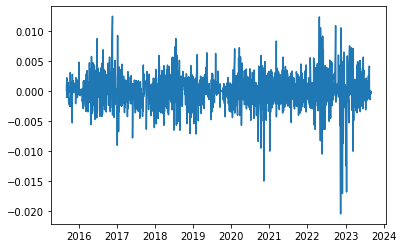

In [153]:
#AR模型的残差作图（体限异方差性）
plt.plot(AR_1_res.resid)

In [162]:
#AR_GARCH model
am = arch.arch_model(fc.ret_data['CNY'],mean='AR',lags=[1,3],vol='GARCH',p=1,o=0,q=1)
res = am.fit()
res.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: -8205.41195669338
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8205.411949187528
            Iterations: 1
            Function evaluations: 7
            Gradient evaluations: 1


c:\Users\86177\anaconda3\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                    CNY   R-squared:                       0.008
Mean Model:                        AR   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:                8205.41
Distribution:                  Normal   AIC:                          -16398.8
Method:            Maximum Likelihood   BIC:                          -16365.9
                                        No. Observations:                 1775
Date:                Mon, Nov 27 2023   Df Residuals:                     1772
Time:                        15:49:13   Df Model:                            3
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const      6.3103e-05  1.892e-05      3.335  8.540e-04 [2.601e-05,1.002e-04]
CNY[1]         0.0740  2.933e-02      2.523  1.165e-02   [1.650e-02,  0.131]
CNY[3]         0.0488  2.428e-02      2.011  4.429e-02 [1.247e-03,9.642e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.3604e-07  1.116e-11  1.218e+04      0.000 [1.360e-07,1.361e-07]
alpha[1]       0.1000  3.404e-02      2.938  3.306e-03   [3.328e-02,  0.167]
beta[1]        0.8800  3.032e-02     29.023 3.399e-185     [  0.821,  0.939]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

In [164]:
#标准化残差做Ljung-Box test
lb_test(res.std_resid.dropna(),lags=15)

,lb_stat,lb_pvalue
1,0.029989,0.862516
2,0.569046,0.752373
3,0.807215,0.847740
4,0.962513,0.915426
5,1.559837,0.906063
6,4.587955,0.597636
7,4.606020,0.707916
8,4.609410,0.798390
9,5.127259,0.823077
10,8.846089,0.546770


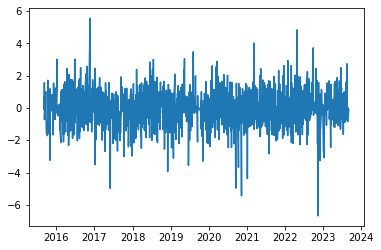

In [165]:
plt.plot(res.std_resid)